A note for `pandas`

In [13]:
%load_ext autoreload
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as skd
import sklearn as skl

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
# http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes
# X, Y = skd.load_diabetes(return_X_y=True)
# XY = np.hstack((X, Y[:, np.newaxis]))
# print 'X size: {}'.format(X.shape)
# print 'Y size: {}'.format(Y.shape)

In [38]:
# Load titanic data into a data frame
df = pd.read_csv('data/titanic-train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [40]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Indexing

In [41]:
df.iloc[2]

PassengerId                         3
Survived                            1
Pclass                              3
Name           Heikkinen, Miss. Laina
Sex                            female
Age                                26
SibSp                               0
Parch                               0
Ticket               STON/O2. 3101282
Fare                            7.925
Cabin                             NaN
Embarked                            S
Name: 2, dtype: object

In [52]:
df.iloc[2:4]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100,C123,S


In [54]:
df.loc[2:4]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050,NaN,S


In [56]:
df.loc[2, 'Name']

'Heikkinen, Miss. Laina'

In [58]:
df.loc[2:4, 'Name']

2                          Heikkinen, Miss. Laina
3    Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                        Allen, Mr. William Henry
Name: Name, dtype: object

In [62]:
df['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [68]:
type(df['Name'])

pandas.core.series.Series

`Series` is a column. A `DataFrame` is a list of columns.

In [69]:
df[['Name', 'Age']].head()

,Name,Age
0,"Braund, Mr. Owen Harris",22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,"Heikkinen, Miss. Laina",26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
4,"Allen, Mr. William Henry",35.0


## Selections

In [74]:
df[df['Age']>70]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [75]:
df[(df['Age'] == 11) & (df['SibSp'] == 5)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9,NaN,S


In [78]:
df['Age'].unique()

array([ 22.  ,  38.  ,  26.  ,  35.  ,    nan,  54.  ,   2.  ,  27.  ,
        14.  ,   4.  ,  58.  ,  20.  ,  39.  ,  55.  ,  31.  ,  34.  ,
        15.  ,  28.  ,   8.  ,  19.  ,  40.  ,  66.  ,  42.  ,  21.  ,
        18.  ,   3.  ,   7.  ,  49.  ,  29.  ,  65.  ,  28.5 ,   5.  ,
        11.  ,  45.  ,  17.  ,  32.  ,  16.  ,  25.  ,   0.83,  30.  ,
        33.  ,  23.  ,  24.  ,  46.  ,  59.  ,  71.  ,  37.  ,  47.  ,
        14.5 ,  70.5 ,  32.5 ,  12.  ,   9.  ,  36.5 ,  51.  ,  55.5 ,
        40.5 ,  44.  ,   1.  ,  61.  ,  56.  ,  50.  ,  36.  ,  45.5 ,
        20.5 ,  62.  ,  41.  ,  52.  ,  63.  ,  23.5 ,   0.92,  43.  ,
        60.  ,  10.  ,  64.  ,  13.  ,  48.  ,   0.75,  53.  ,  57.  ,
        80.  ,  70.  ,  24.5 ,   6.  ,   0.67,  30.5 ,   0.42,  34.5 ,  74.  ])

## Aggregation

In [80]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [84]:
df.groupby(['Survived', 'Pclass'])['PassengerId'].count()

Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: PassengerId, dtype: int64

In [86]:
df['Age'].min()

0.41999999999999998

In [90]:
mean_gb_survived = df.groupby('Survived')['Age'].mean()
mean_gb_survived

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

In [92]:
std_gb_survived = df.groupby('Survived')['Age'].std()
std_gb_survived

Survived
0    14.172110
1    14.950952
Name: Age, dtype: float64

## Join DataFrames

In [99]:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reset_index.htmlkjkk
df1 = mean_gb_survived.reset_index()
df2 = std_gb_survived.reset_index()
df1

,Survived,Age
0,0,30.626179
1,1,28.343690


In [100]:
df2

,Survived,Age
0,0,14.172110
1,1,14.950952


In [103]:
# join
df3 = pd.merge(df1, df2, on='Survived')
df3

,Survived,Age_x,Age_y
0,0,30.626179,14.172110
1,1,28.343690,14.950952


In [105]:
df3.columns = ['Survived', 'Avg_age', 'Std_age']
df3

,Survived,Avg_age,Std_age
0,0,30.626179,14.172110
1,1,28.343690,14.950952


## Plot

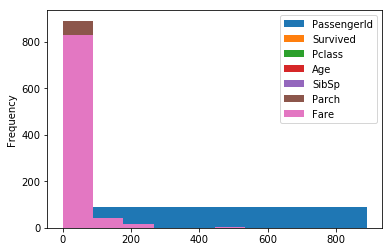

In [107]:
df.plot(kind='hist')